<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/Assignment7/DB_Scan_clustering_using_pycaret_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret

df = pd.read_csv('/content/drive/MyDrive/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
from pycaret.clustering import *

In [5]:
exp_clu101 = setup(df, normalize = True,
                   ignore_features = ['ID'],
                   session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(2000, 8)"
2,Transformed data shape,"(2000, 7)"
3,Ignore features,1
4,Numeric features,7
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [6]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2688,633.8068,1.3315,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [10]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,Cluster 1
1,1,1,22,1,150773,1,2,Cluster 2
2,0,0,49,1,89210,0,0,Cluster 0
3,0,0,45,1,171565,1,1,Cluster 3
4,0,0,53,1,149031,1,1,Cluster 3


In [11]:
plot_model(kmeans)

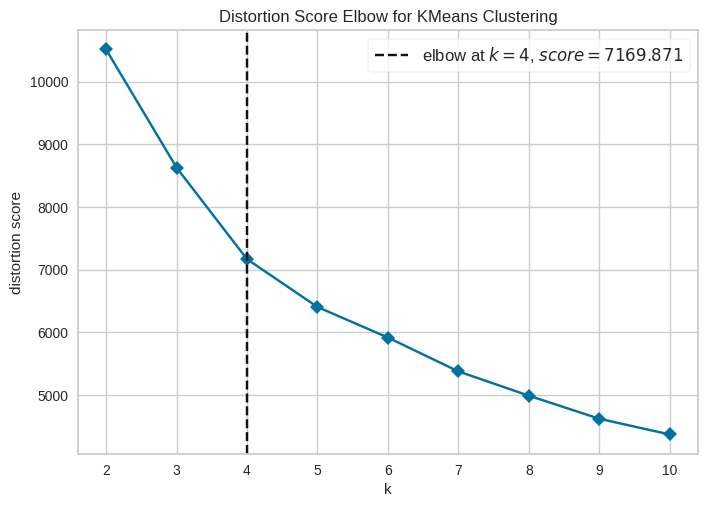

In [12]:
plot_model(kmeans, plot = 'elbow')

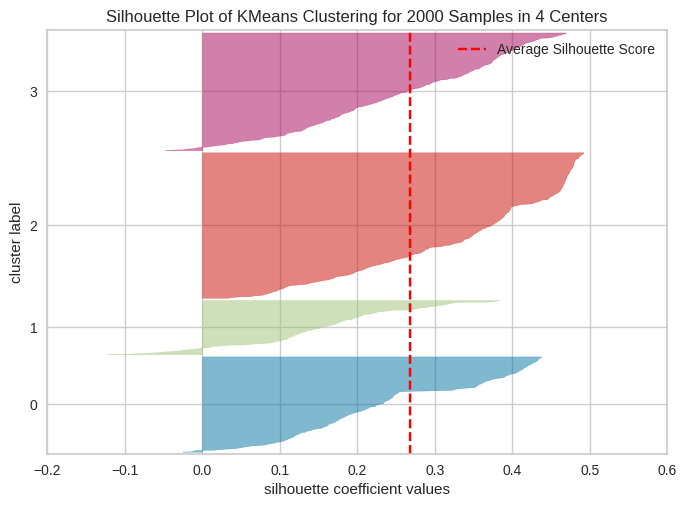

In [13]:
plot_model(kmeans, plot = 'silhouette')

In [14]:
plot_model(kmeans, plot = 'distribution')

In [22]:
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,1.090038,1.007025,-0.760382,-0.063372,-0.704985,-1.269525,-0.90973,Cluster 2
1,1.090038,1.007025,0.093117,-0.063372,-0.679367,-1.269525,-0.90973,Cluster 2
2,-0.917399,-0.993024,-0.248283,-1.731068,-0.095708,0.296823,-0.90973,Cluster 0
3,-0.917399,-0.993024,-0.248283,-0.063372,-0.232587,0.296823,-0.90973,Cluster 0
4,1.090038,-0.993024,0.093117,-0.063372,0.077130,0.296823,-0.90973,Cluster 0
